<a href="https://colab.research.google.com/github/jinseriouspark/pytorch_with_jax/blob/main/pytorch_to_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transform pytorch to jax

- 활용자료 : https://github.com/hunkim/PyTorchZeroToAll

In [203]:
!git clone https://github.com/hunkim/PyTorchZeroToAll.git

Cloning into 'PyTorchZeroToAll'...
remote: Enumerating objects: 598, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 598 (delta 3), reused 4 (delta 0), pack-reused 589
Receiving objects: 100% (598/598), 52.77 MiB | 19.15 MiB/s, done.
Resolving deltas: 100% (389/389), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Transform pytorch to jax

In [201]:
import pandas as pd

data = pd.read_csv('/content/sample_data/california_housing_train.csv', nrows = 100)
feature_col = 'median_income'
target_col = 'median_house_value'

# 01_basic.py

	 1.0 2.0 0.0 4.0
	 2.0 4.0 0.0 16.0
	 3.0 6.0 0.0 36.0
MSE= 18.666666666666668
	 1.0 2.0 1.0 1.0
	 2.0 4.0 2.0 4.0
	 3.0 6.0 3.0 9.0
MSE= 4.666666666666667
	 1.0 2.0 2.0 0.0
	 2.0 4.0 4.0 0.0
	 3.0 6.0 6.0 0.0
MSE= 0.0
	 1.0 2.0 3.0 1.0
	 2.0 4.0 6.0 4.0
	 3.0 6.0 9.0 9.0
MSE= 4.666666666666667


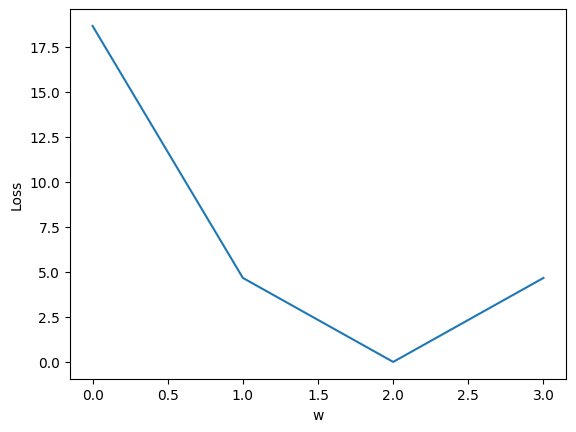

In [7]:
# 01_basic.py
import numpy as np
import matplotlib.pyplot as plt

#x_data = data[feature_col].values
#y_data = data[target_col].values

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) **2

# list of weights/mean square Error (MSE) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.0, 1.0):
  l_sum = 0
  for x_val, y_val in zip(x_data, y_data):
    y_pred_val = forward(x_val)
    l = loss(x_val, y_val)
    l_sum += l

    print('\t', x_val, y_val, y_pred_val, l)
  print('MSE=', l_sum/ len(x_data)) # 직접 평균 계산
  w_list.append(w)
  mse_list.append(l_sum / len(x_data))
# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

## 01_basic with jax

Epoch 1, Loss 3.836207151412964
Epoch 11, Loss 0.5405738353729248
Epoch 21, Loss 0.0761740654706955
Epoch 31, Loss 0.01073399931192398
Epoch 41, Loss 0.0015125819481909275
Epoch 51, Loss 0.00021314274636097252
Epoch 61, Loss 3.003445999638643e-05
Epoch 71, Loss 4.233250365359709e-06
Epoch 81, Loss 5.96372842665005e-07
Epoch 91, Loss 8.396483508477104e-08
0:00:02.927140


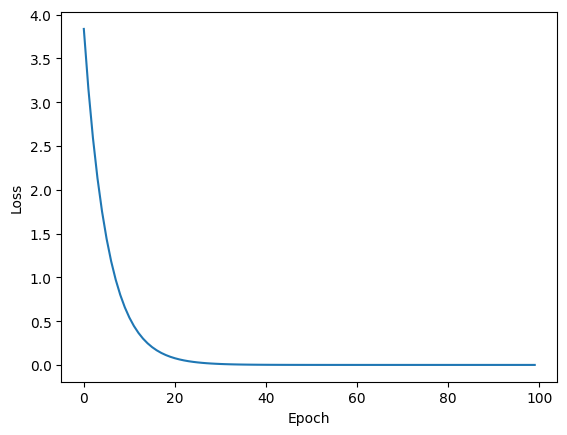

In [8]:
# 01_basic with jax
## jax.numpy as jnp , from jax import grad, jnp.mean() 등을 사용

import datetime
import jax.numpy as jnp
from jax import grad
import matplotlib.pyplot as plt

start_time = datetime.datetime.now()
# 데이터 정의
x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

# forward pass
def forward(x, w):
  return x * w
# loss
def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) **2)

# grad를 계산하는 함수 생성
grad_loss = grad(loss)

# 초기 w 값 설정
w = 1.0

# w업데이트하면서 손실감소
num_epochs = 100
losses = []
lr = 0.01

for epoch in range(num_epochs):
  grad_w = grad_loss(w, x_data, y_data)
  w -= lr * grad_w
  loss_val = loss(w, x_data, y_data)
  losses.append(loss_val)
  if epoch % 10 == 0:
      print(f'Epoch {epoch + 1}, Loss {loss_val}')

end_time = datetime.datetime.now()
print(end_time - start_time)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# 02_manual_gradient.py

In [9]:
# training data
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

w = 1.0

# forward pass
def forward(x):
  return x * w

# loss function
def loss(x, y):
  y_pred = forward(x)
  return (y_pred - y) * (y_pred - y) # 오차제곱

# compute gradient
def gradient(x, y):
  return 2 * x * (x * w - y)

# before training
print('prediction (before training)', 4, forward(4))

# training loop
for epoch in range(10):
  for x_val, y_val in zip(x_data, y_data):
    grad = gradient(x_val, y_val)
    w = w - 0.01 * grad
    print('\tgrad: ', x_val, y_val, round(grad, 2))
    l = loss(x_val, y_val) # 오차 제곱을 데이터셋 별로 더하여 계산
  print('progress:', epoch, 'w=', round(w, 2), 'loss=', round(1, 2))

#after training
print('predicted score (after training)', 4, forward(4))

prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -7.84
	grad:  3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 1
	grad:  1.0 2.0 -1.48
	grad:  2.0 4.0 -5.8
	grad:  3.0 6.0 -12.0
progress: 1 w= 1.45 loss= 1
	grad:  1.0 2.0 -1.09
	grad:  2.0 4.0 -4.29
	grad:  3.0 6.0 -8.87
progress: 2 w= 1.6 loss= 1
	grad:  1.0 2.0 -0.81
	grad:  2.0 4.0 -3.17
	grad:  3.0 6.0 -6.56
progress: 3 w= 1.7 loss= 1
	grad:  1.0 2.0 -0.6
	grad:  2.0 4.0 -2.34
	grad:  3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 1
	grad:  1.0 2.0 -0.44
	grad:  2.0 4.0 -1.73
	grad:  3.0 6.0 -3.58
progress: 5 w= 1.84 loss= 1
	grad:  1.0 2.0 -0.33
	grad:  2.0 4.0 -1.28
	grad:  3.0 6.0 -2.65
progress: 6 w= 1.88 loss= 1
	grad:  1.0 2.0 -0.24
	grad:  2.0 4.0 -0.95
	grad:  3.0 6.0 -1.96
progress: 7 w= 1.91 loss= 1
	grad:  1.0 2.0 -0.18
	grad:  2.0 4.0 -0.7
	grad:  3.0 6.0 -1.45
progress: 8 w= 1.93 loss= 1
	grad:  1.0 2.0 -0.13
	grad:  2.0 4.0 -0.52
	grad:  3.0 6.0 -1.07
progress: 9 w= 1.95 loss= 1
predicted score (after trainin

## with jax

In [ ]:
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = 1.0

def forward(x, w):
  return x * w

def loss(w, x, y):
  y_pred = forward(x, w)
  return jnp.mean((y_pred - y) ** 2)

# gradient 계산,loss 함수를 입력으로 받아들여 그래디언트 계산하는 함수로 반환
grad_loss = grad(loss)

print('prediction (before_training)', forward(4, w))

# training
learning_rate= 0.01
num_epochs = 10

for epoch in range(num_epochs):
  for x_val, y_val in zip(x_data, y_data):
    grad_w = grad_loss(w, x_val, y_val)
    w -= learning_rate * grad_w
    print('\tgrad:', x_val, y_val, round(grad_w, 2))
    loss_val = loss(w, x_val, y_val)
  print('progress:', epoch, 'w=', round(w, 2), 'loss=', round(loss_val, 2))

# 학습 후 예측
print('predicted score (after training):', forward(4, w))

prediction (before_training) 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.8399997
	grad: 3.0 6.0 -16.23
progress: 0 w= 1.26 loss= 4.92
	grad: 1.0 2.0 -1.48
	grad: 2.0 4.0 -5.7999997
	grad: 3.0 6.0 -12.0
progress: 1 w= 1.4499999 loss= 2.69
	grad: 1.0 2.0 -1.09
	grad: 2.0 4.0 -4.29
	grad: 3.0 6.0 -8.87
progress: 2 w= 1.5999999 loss= 1.4699999
	grad: 1.0 2.0 -0.81
	grad: 2.0 4.0 -3.1699998
	grad: 3.0 6.0 -6.56
progress: 3 w= 1.6999999 loss= 0.79999995
	grad: 1.0 2.0 -0.59999996
	grad: 2.0 4.0 -2.34
	grad: 3.0 6.0 -4.85
progress: 4 w= 1.78 loss= 0.44
	grad: 1.0 2.0 -0.44
	grad: 2.0 4.0 -1.73
	grad: 3.0 6.0 -3.58
progress: 5 w= 1.8399999 loss= 0.24
	grad: 1.0 2.0 -0.32999998
	grad: 2.0 4.0 -1.28
	grad: 3.0 6.0 -2.6499999
progress: 6 w= 1.88 loss= 0.13
	grad: 1.0 2.0 -0.24
	grad: 2.0 4.0 -0.95
	grad: 3.0 6.0 -1.9599999
progress: 7 w= 1.91 loss= 0.07
	grad: 1.0 2.0 -0.17999999
	grad: 2.0 4.0 -0.7
	grad: 3.0 6.0 -1.4499999
progress: 8 w= 1.93 loss= 0.04
	grad: 1.0 2.0 -0.13
	grad: 2.0 4.0 -0.52
	

In [ ]:
# 위의 manual gradient 계산할 때는 loss 계산에서 틀린 것이 없었다.

In [ ]:
grad_w, loss_val

(DeviceArray(-1.0708666, dtype=float32, weak_type=True),
 DeviceArray(0.02141885, dtype=float32))

# 03_auto_gradient.py

In [72]:
l.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [73]:
import torch
import pdb

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
w = torch.tensor([1.0], requires_grad = True)

# forward pass
def forward(x):
  return x * w

# loss function
def loss(y_pred, y_val):
  return (y_pred - y_val) **2

# before training
print('prediction (before training)', 4, forward(4).item())

# training loop
for epoch in range(1):
  for x_val, y_val in zip(x_data, y_data):
    y_pred = forward(x_val) # 1) forward pass
    l = loss(y_pred, y_val) # 2) compute loss
    print(f'{y_pred},{y_val} loss : {l.item()}')
    l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    w.data = w.data - 0.01 * w.grad.item()

    w.grad.data.zero_()
  print(f'Epoch: {epoch} | loss : {l.item()}')

# after training
print('prediction (after training)', 4, forward(4).item())

prediction (before training) 4 4.0
tensor([1.], grad_fn=<MulBackward0>),2.0 loss : 1.0
tensor([2.0400], grad_fn=<MulBackward0>),4.0 loss : 3.841600179672241
tensor([3.2952], grad_fn=<MulBackward0>),6.0 loss : 7.315943717956543
Epoch: 0 | loss : 7.315943717956543
prediction (after training) 4 5.042752265930176


In [70]:
loss(2.04, 4)

3.8415999999999997

## with jax
- torch 구현보다 예측력이 떨어진다!?

y_pred : 1.0, y_true:2.0
torch loss: 1.0, w grad : -2.0
jax loss: 1.0, y grad: -2.0
jax loss: 1.0, param grad: [-2.]
----------
y_pred : 2.0, y_true:4.0
torch loss: 4.0, w grad : -8.0
jax loss: 4.0, y grad: -4.0
jax loss: 4.0, param grad: [-8.]
----------
y_pred : 3.0, y_true:6.0
torch loss: 9.0, w grad : -18.0
jax loss: 9.0, y grad: -6.0
jax loss: 9.0, param grad: [-18.]
----------


In [153]:
# 수정 전
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = jnp.array([1.0]) # 당연하게 requires_grad = True 는 없다

def forward(x):
  return x * w

def loss(y_pred, y_val):
  return (y_pred - y_val)**2

learning_rate = 0.01
grad_loss = grad(loss)

print('prediction (before training)', 4, forward(4)[0])

for epoch in range(20):
  for x_val, y_val in zip(x_data, y_data):
    # y_pred = forward(x_val) # 1) forward pass
    #l = loss(y_pred, y_val) # 2) compute loss
    #l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    y_pred = forward(x_val)
    grad_w = grad_loss(y_pred[0],y_val)
    w -= learning_rate * grad_w
    print('\tgrad: ', x_val, y_val, grad_w)

  print(f'Epoch: {epoch} | Loss: {loss(forward(x_data), y_data)}')

print('prediction (after training)', 4, forward(4)[0], '-> 잘못된 grad() 사용으로 인한 결과물 오류 ')

prediction (before training) 4 4.0
	grad:  1.0 2.0 -2.0
	grad:  2.0 4.0 -3.92
	grad:  3.0 6.0 -5.6448
Epoch: 0 | Loss: [0.7820786 3.1283145 7.038707 ]
	grad:  1.0 2.0 -1.7687042
	grad:  2.0 4.0 -3.46666
	grad:  3.0 6.0 -4.99199
Epoch: 1 | Loss: [0.6116468 2.446587  5.5048213]
	grad:  1.0 2.0 -1.564157
	grad:  2.0 4.0 -3.0657477
	grad:  3.0 6.0 -4.4146767
Epoch: 2 | Loss: [0.4783557 1.9134228 4.3052006]
	grad:  1.0 2.0 -1.3832653
	grad:  2.0 4.0 -2.7111998
	grad:  3.0 6.0 -3.9041271
Epoch: 3 | Loss: [0.37411162 1.4964465  3.3670046 ]
	grad:  1.0 2.0 -1.2232933
	grad:  2.0 4.0 -2.397655
	grad:  3.0 6.0 -3.4526234
Epoch: 4 | Loss: [0.29258466 1.1703386  2.6332629 ]
	grad:  1.0 2.0 -1.0818219
	grad:  2.0 4.0 -2.1203709
	grad:  3.0 6.0 -3.0533333
Epoch: 5 | Loss: [0.22882412 0.9152965  2.0594177 ]
	grad:  1.0 2.0 -0.9567113
	grad:  2.0 4.0 -1.875154
	grad:  3.0 6.0 -2.700222
Epoch: 6 | Loss: [0.17895843 0.7158337  1.6106262 ]
	grad:  1.0 2.0 -0.8460696
	grad:  2.0 4.0 -1.6582966
	grad:  3.0

## 오류 해결:  torch w.grad.data.zeros_() 와 jax.grad(, argnums = (0,1)) 를 비교

In [40]:
# torch, jax 간 같은 loss 함수를 사용함에도 불구하고 사용법에 따라 문제가 발생하는 이유
# grad 를 계산하는 방식이 다름
## torch
# l = loss(y_pred, y_true)
# l.backward()

## jax
# grad_loss=grad(loss)
# grad_loss(y_pred, y_true)


w_torch = torch.tensor([1.0], requires_grad = True)
w_jax = jnp.array([1.0]) # 당연하게 requires_grad = True 는 없다
def forward_torch(x):
    return x * w_torch
def forward_jax(w_jax, x):
    return x * w_jax

def loss(y_pred, y_true):
    return (y_pred - y_true) **2

def loss_fn(params, x, y):
    return jnp.mean((forward_jax(params, x) - y) **2)


x_data_torch = torch.tensor([1.0, 2.0, 3.0], requires_grad=False)
y_data_torch = torch.tensor([2.0, 4.0, 6.0], requires_grad=False)

x_data_jax = jnp.array([1.0, 2.0, 3.0])
y_data_jax = jnp.array([2.0, 4.0, 6.0])

for x_val_t, y_val_t, x_val_j, y_val_j in zip(x_data_torch, y_data_torch, x_data_jax, y_data_jax):

    # torch
    y_pred_torch = forward_torch(x_val_t)
    l = loss(y_pred_torch, y_val_t)
    l.backward()
    print(f'y_pred : {y_pred_torch.item()}, y_true:{y_val_t}')
    print(f'torch loss: {l.item()}, w grad : {w_torch.grad.item()}') # w에 대한 gradient 였음
    w_torch.grad.data.zero_()

    # jax
    y_pred_jax = forward_jax(w_jax, x_val_j)
   #print(f'y_pred : {y_pred_jax[0]}, y_true:{y_val}')
    jax_loss = loss(y_pred_jax[0], y_val_j)
    grad_ = grad_loss(y_pred_jax[0], y_val_j) # 이런 방식으로 gradient 를 구한다면, y에 대한 gradient 가 출력됨
    print(f'jax loss: {jax_loss}, y grad: {grad_}')

    grad2 = jax.grad(loss_fn, argnums=(0, 1))(w_jax, x_val_j, y_val_j)
    # 위와 같은 방식으로 해야만 제대로 weight 에 대한 gradient 를 계산할 수 있음
    print(f'jax loss: {jax_loss}, param grad: {grad2[0]}')
    print('-' * 10)

Array(7.657576, dtype=float32)

In [158]:
# 수정 후
import jax.numpy as jnp
from jax import grad

x_data = jnp.array([1.0, 2.0, 3.0])
y_data = jnp.array([2.0, 4.0, 6.0])

w = jnp.array([1.0]) # 당연하게 requires_grad = True 는 없다

def forward(x):
  return x * w

def loss(y_pred, y_val):
  return (y_pred - y_val)**2

learning_rate = 0.01

print('prediction (before training)', 4, forward(4)[0])

for epoch in range(20):
  for x_val, y_val in zip(x_data, y_data):
    # y_pred = forward(x_val) # 1) forward pass
    #l = loss(y_pred, y_val) # 2) compute loss
    #l.backward() # 3) backpropagation to update weights
    #print('\t grad:', x_val, y_val, w.grad.item())
    y_pred = forward(x_val)
    grad_w = jax.grad(loss_fn, argnums=(0, 1))(w, x_val, y_val)
    w -= learning_rate * grad_w[0]
    print('\tgrad: ', x_val, y_val, grad_w[0])

  print(f'Epoch: {epoch} | Loss: {loss(forward(x_data), y_data)}')

print('prediction (after training)', 4, forward(4)[0], '->제대로 학습한 결과물 ')

prediction (before training) 4 4.0
	grad:  1.0 2.0 [-2.]
	grad:  2.0 4.0 [-7.84]
	grad:  3.0 6.0 [-16.228802]
Epoch: 0 | Loss: [0.54658216 2.1863286  4.919239  ]
	grad:  1.0 2.0 [-1.4786239]
	grad:  2.0 4.0 [-5.7962055]
	grad:  3.0 6.0 [-11.998146]
Epoch: 1 | Loss: [0.29875213 1.1950085  2.688769  ]
	grad:  1.0 2.0 [-1.0931644]
	grad:  2.0 4.0 [-4.285205]
	grad:  3.0 6.0 [-8.870373]
Epoch: 2 | Loss: [0.16329262 0.65317047 1.4696338 ]
	grad:  1.0 2.0 [-0.80818963]
	grad:  2.0 4.0 [-3.1681032]
	grad:  3.0 6.0 [-6.557974]
Epoch: 3 | Loss: [0.0892528  0.3570112  0.80327564]
	grad:  1.0 2.0 [-0.59750414]
	grad:  2.0 4.0 [-2.3422165]
	grad:  3.0 6.0 [-4.8483896]
Epoch: 4 | Loss: [0.04878404 0.19513616 0.43905652]
	grad:  1.0 2.0 [-0.44174218]
	grad:  2.0 4.0 [-1.7316294]
	grad:  3.0 6.0 [-3.5844727]
Epoch: 5 | Loss: [0.02666449 0.10665795 0.23998016]
	grad:  1.0 2.0 [-0.3265853]
	grad:  2.0 4.0 [-1.2802143]
	grad:  3.0 6.0 [-2.6500454]
Epoch: 6 | Loss: [0.01457433 0.05829733 0.13116899]
	gra

# 05_linear_regression.py

In [172]:
from torch import nn
import torch
from torch import tensor

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

class Model(nn.Module):
  def __init__(self):
    super(Model, self).__init__()
    self.linear = torch.nn.Linear(1, 1) # one in and one out , 인풋 1개에 대한 아웃풋 1개

  def forward(self, x):
    y_pred = self.linear(x)
    return y_pred

model = Model()
# 가중치 초기화
nn.init.constant_(model.linear.weight, 1.0) # 참고 코드엔 없는 내역
nn.init.constant_(model.linear.bias, 0.0) # 참고 코드엔 없는 내역

# loss function & optimizer
criterion = torch.nn.MSELoss(reduction = 'sum') # data point 별로 발생한 loss를 합칠 때 sum, 평균을 낼때는 mean
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

# training loop
hour_var = tensor([[4.0]])
print('prediction (before training)', 4,  model(hour_var).data[0][0].item())
for epoch in range(500):
    # 1) forward pass : compute predicted y by passing x to the model
    y_pred = model(x_data)

    # 2) compute and print loss
    loss = criterion(y_pred, y_data)
    print(f'Epoch: {epoch} | Loss: {loss.item()}')

    optimizer.zero_grad() # w.grad.data.zero_() 와 같은 기능
    loss.backward() # perform backward pass
    optimizer.step() # update the weights

# after training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print(f'prediction (after training)', 4, model(hour_var).data[0][0].item())

prediction (before training) 4 4.0
Epoch: 0 | Loss: 14.0
Epoch: 1 | Loss: 6.26400089263916
Epoch: 2 | Loss: 2.8196988105773926
Epoch: 3 | Loss: 1.2859458923339844
Epoch: 4 | Loss: 0.6027218103408813
Epoch: 5 | Loss: 0.2981351912021637
Epoch: 6 | Loss: 0.16211287677288055
Epoch: 7 | Loss: 0.10113726556301117
Epoch: 8 | Loss: 0.07357636839151382
Epoch: 9 | Loss: 0.06089683622121811
Epoch: 10 | Loss: 0.0548475943505764
Epoch: 11 | Loss: 0.0517561249434948
Epoch: 12 | Loss: 0.04998693987727165
Epoch: 13 | Loss: 0.04881209135055542
Epoch: 14 | Loss: 0.04790737107396126
Epoch: 15 | Loss: 0.047128405421972275
Epoch: 16 | Loss: 0.04641082137823105
Epoch: 17 | Loss: 0.045725904405117035
Epoch: 18 | Loss: 0.045060813426971436
Epoch: 19 | Loss: 0.04440966248512268
Epoch: 20 | Loss: 0.04376979172229767
Epoch: 21 | Loss: 0.04314004257321358
Epoch: 22 | Loss: 0.042519811540842056
Epoch: 23 | Loss: 0.041908636689186096
Epoch: 24 | Loss: 0.041306257247924805
Epoch: 25 | Loss: 0.040712546557188034
Epoc

## with jax
- jax 는 pytorch와 다르게 함수형 프로그램을 강조하고 있음 (class 가 필요없음)
- 모델과 관련된 파라미터와 계산을 함수로 구현하여 사용하는 것이 일반적임


### 변경사항
  - loss 를 optax 내장함수로 바꾸어줌
  - opimizer 가 2줄짜리로 변경 : opt_state, params 업데이트 필요

### optax 를 사용한 최적화 코드

[참고자료](https://optax.readthedocs.io/en/latest/api/optimizers.html#optax.sgd)

```
# optax.sgd 를 활용해 optimizer 를 초기화 할때, params 가 jax 배열이 아니기때문에 오류가 발생
optimizer = optax.sgd(learning_rate = 0.01)

# 아래와 같이 한번 init 해주어야함
opt_state = optimizer.init(params)


# optimizer 를 활용해 업데이트를 하면 opt_state 가 업데이트 되며,
# 이를 다시 apply_updates 로 처리해서 실제 업데이트도 진행
updates, opt_state = optimizer.update(grads, opt_state, params)
params = optax.apply_updates(params, updates)

```


Q. jit 을 gradient 계산하는 부분에 적용하기 위해서는 어떻게 해야 하는가?


chat gpt 설명
```
@jit
def value_and_grad(params, x, y):
    return jax.value_and_grad(loss)(params, x, y)
```


In [ ]:
import jax.numpy as jnp
from jax import grad, jit
import optax

x_data = jnp.array([[1.0], [2.0], [3.0]])
y_data = jnp.array([[2.0], [4.0], [6.0]])

def model(params, x):
    return jnp.dot(x, params['weight']) + params['bias']

def loss(params, x, y):
    y_pred = model(params, x)
    return jnp.sum((y_pred - y) ** 2)

init_params = {'weight' : jnp.array([[1.0]]), 'bias': jnp.array([0.0])}
optimizer = optax.sgd(learning_rate = 0.01)
opt_state = optimizer.init(init_params)

@jit
def update(params, opt_state, x, y):
    grads = jax.grad(loss)(params, x, y)
    updates, opt_state = optimizer.update(grads, opt_state)
    new_params = optax.apply_updates(params, updates) # optimizer.step()
    return new_params, opt_state

num_epochs= 500
params = init_params

#
for epoch in range(num_epochs):
    loss_val = loss(params, x_data, y_data)
    params, opt_state = update(params, opt_state, x_data, y_data)
    print(f'Epoch: {epoch} | Loss: {loss_val}')

# After training
hour_var = jnp.array([[4.0]])
y_pred = model(params, hour_var)
print("Prediction (after training):", 4, y_pred[0][0])


# 06_logistic_regression.py

In [193]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# dataset
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])

class Model(nn.Module):
  def __init__(self):
    """
    instantiate nn.Linear Module
    """
    super(Model, self).__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    y_pred = sigmoid(self.linear(x))
    return y_pred

# out model
model = Model()

# 가중치 초기화
nn.init.constant_(model.linear.weight, 1.0)
nn.init.constant_(model.linear.bias, 0.0)

# loss function & optimizer contruction
# call to model.parameters()
criterion = nn.BCELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = 0.01)


#Traning loop
for epoch in range(1000):
  # forward pass : compute predicted y by passing x to the model
  y_pred = model(x_data)

  # compute and print loss
  loss = criterion(y_pred, y_data)

  if epoch % 100 == 0:
    print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

  #zero gradient, perform a backward pass, update the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

#After training
print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(tensor([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(tensor([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')

Epoch 1/1000 | Loss: 0.8767
Epoch 101/1000 | Loss: 0.5963
Epoch 201/1000 | Loss: 0.5436
Epoch 301/1000 | Loss: 0.5231
Epoch 401/1000 | Loss: 0.5053
Epoch 501/1000 | Loss: 0.4888
Epoch 601/1000 | Loss: 0.4733
Epoch 701/1000 | Loss: 0.4588
Epoch 801/1000 | Loss: 0.4452
Epoch 901/1000 | Loss: 0.4325

Let's predict the hours need to score above 50%
Prediction after 1 hour of training: 0.3376 | Above 50%: False
Prediction after 7 hours of training: 0.9813 | Above 50%: True


## with jax

In [194]:

import jax
import jax.numpy as jnp
from jax import jit
import optax

x_data = jnp.array([[1.0], [2.0], [3.0], [4.0]])
y_data = jnp.array([[0.], [0.], [1.], [1.]])

# 모델 정의하기
def model(params, x):
    return jax.nn.sigmoid(jnp.dot(x, params['weight']) + params['bias'])

# 가중치 초기화
# # 랜덤 초기화
# key = jax.random.PRNGKey(0)
# init_params = {
#     'weight': jax.random.normal(key, (1, 1)),
#     'bias': jax.random.normal(key, (1, ))
# }

# 지정값으로 초기화
init_params = {'weight': jnp.array([[1.0]]), 'bias': jnp.array([0.0])}

# 손실함수 및 최적화기 정의하기
def binary_cross_entropy(y_hat, y):
    bce = y * jnp.log(y_hat) + (1 - y) * jnp.log(1 - y_hat)
    return jnp.mean(-bce)

def loss(params, x, y):
    y_pred = model(params, x)
    #return optax.sigmoid_binary_cross_entropy(y_pred, y).mean()
    return binary_cross_entropy(y_pred, y).mean()

optimizer = optax.sgd(learning_rate = 0.01)
opt_state = optimizer.init(params)

# def update(params, opt_state, x, y):
#     grads = jax.grad(loss)(params, x, y)
#     updates, opt_state = optimizer.update(grad, opt_state)
#     new_params =

num_epochs = 1000
params = init_params

for epoch in range(num_epochs):
    loss_val, grads = jax.value_and_grad(loss)(params, x_data, y_data)
    updates, opt_state = optimizer.update(grads, opt_state, params) # optax.sgd~  의 update 는 x, y 데이터셋을 필요로 하지 않음
    params = optax.apply_updates(params, updates)

    if epoch % 100 == 0:
        print(f'Epoch : {epoch + 1} / {num_epochs}| loss: {loss_val}')


#After training
print(f'\nLet\'s predict the hours need to score above 50%\n{"=" * 50}')
hour_var = model(params, jnp.array([[1.0]]))
print(f'Prediction after 1 hour of training: {hour_var.item():.4f} | Above 50%: {hour_var.item() > 0.5}')
hour_var = model(params, jnp.array([[7.0]]))
print(f'Prediction after 7 hours of training: {hour_var.item():.4f} | Above 50%: { hour_var.item() > 0.5}')

Epoch : 1 / 1000| loss: 0.8767316341400146
Epoch : 101 / 1000| loss: 0.5962704420089722
Epoch : 201 / 1000| loss: 0.5435957908630371
Epoch : 301 / 1000| loss: 0.5230756998062134
Epoch : 401 / 1000| loss: 0.5053068399429321
Epoch : 501 / 1000| loss: 0.4887562096118927
Epoch : 601 / 1000| loss: 0.4732797145843506
Epoch : 701 / 1000| loss: 0.45879119634628296
Epoch : 801 / 1000| loss: 0.4452126622200012
Epoch : 901 / 1000| loss: 0.4324727952480316

Let's predict the hours need to score above 50%
Prediction after 1 hour of training: 0.3376 | Above 50%: False
Prediction after 7 hours of training: 0.9813 | Above 50%: True


# 07_diabets_logistic.py

In [205]:
from torch import nn, optim, from_numpy
import numpy as np
import pandas as pd

xy = np.loadtxt('/content/PyTorchZeroToAll/data/diabetes.csv.gz', delimiter=',', dtype = np.float32)
x_data = from_numpy(xy[:, 0: -1])
y_data = from_numpy(xy[:, [-1]])

print(f'X\'s shape: {x_data.shape} | Y\'s shape: {y_data.shape}')

X's shape: torch.Size([759, 8]) | Y's shape: torch.Size([759, 1])


In [208]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)

        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out1= self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

model = Model()

criterion = nn.BCELoss(reduction = 'mean')
optimizer = optim.SGD(model.parameters(), lr = 0.1)

for epoch in range(100):
    # forward pass
    y_pred = model(x_data)
    # compute and print loss
    loss = criterion(y_pred, y_data)
    if epoch % 10 == 0:
        print(f'Epoch {epoch + 1} / 100 | Loss : {loss.item():.4f}')

    # zero gradients, perform a backward pass, update weights
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1 / 100 | Loss : 0.6928
Epoch 11 / 100 | Loss : 0.6589
Epoch 21 / 100 | Loss : 0.6494
Epoch 31 / 100 | Loss : 0.6465
Epoch 41 / 100 | Loss : 0.6457
Epoch 51 / 100 | Loss : 0.6454
Epoch 61 / 100 | Loss : 0.6453
Epoch 71 / 100 | Loss : 0.6453
Epoch 81 / 100 | Loss : 0.6453
Epoch 91 / 100 | Loss : 0.6453


In [211]:
import jax.numpy as jnp
import numpy as np
import optax
import jax

# define model using flax
import flax.linen as nn

@nn.compact
class Model(nn.Module):
    def setup(self):
        self.l1 = nn.Dense(6)
        self.l2 = nn.Dense(4)
        self.l3 = nn.Dense(1)

    def __call__(self, x):
        out1 = nn.sigmoid(self.l1(x))
        out2 = nn.sigmoid(self.l2(out1))
        y_pred = nn.sigmoid(self.l3(out2))
        return y_pred

model = Model()

# Define loss function
def loss(params, model,  x, y):
    logits = model.apply({"params": params}, x)
    return jnp.mean(jax.nn.sigmoid_cross_entropy_with_logits(logits=logits, labels=y))

# Initialize model parameters
rng = jax.random.PRNGKey(0)
params = model.init(rng, jnp.ones((1, 8), dtype=jnp.float32))


# Initialize optimizer
optimizer = optax.sgd(learning_rate=0.1)
optimizer_state = optimizer.init(params)


# Define training step
@jax.jit
def tarin_step(optimizer_state, x, y):
    params = optimizer_state
    grads = jax.grad(loss_fn)(params, model,  x, y)
    updates, new_optimizer_state = optimizer.update(grads, optimizer_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, new_optimizer_state

# Training loop
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    optimizer_state, _ = train_step(optimizer_state, x_data, y_data)


TypeError: Cannot interpret 'torch.float32' as a data type

In [214]:
x_data

tensor([[-0.2941,  0.4874,  0.1803,  ...,  0.0015, -0.5312, -0.0333],
        [-0.8824, -0.1457,  0.0820,  ..., -0.2072, -0.7669, -0.6667],
        [-0.0588,  0.8392,  0.0492,  ..., -0.3055, -0.4927, -0.6333],
        ...,
        [-0.4118,  0.2161,  0.1803,  ..., -0.2191, -0.8574, -0.7000],
        [-0.8824,  0.2663, -0.0164,  ..., -0.1028, -0.7686, -0.1333],
        [-0.8824, -0.0653,  0.1475,  ..., -0.0939, -0.7976, -0.9333]])

In [ ]:
i



# Initialize optimizer
optimizer = optax.sgd(learning_rate=0.1)
optimizer_state = optimizer.init(params)

# Define training step
@jax.jit
def train_step(optimizer_state, batch):
    params = optimizer_state
    grads = jax.grad(loss_fn)(params, model, batch)
    updates, new_optimizer_state = optimizer.update(grads, optimizer_state)
    new_params = optax.apply_updates(params, updates)
    return new_params, new_optimizer_state

# Define data loader function
def data_loader(x_data, y_data, batch_size=32, shuffle=True):
    num_samples = len(x_data)
    indices = jax.random.permutation(rng, num_samples)
    for i in range(0, num_samples, batch_size):
        batch_indices = indices[i:i+batch_size]
        yield x_data[batch_indices], y_data[batch_indices]

# Training loop
num_epochs = 100
batch_size = 32
for epoch in range(num_epochs):
    for batch in data_loader(x_data, y_data, batch_size=batch_size):
        optimizer_state, _ = train_step(optimizer_state, batch)


ApplyScopeInvalidVariablesTypeError: The first argument passed to an apply function should be a dictionary of collections. Each collection should be a dictionary with string keys. (https://flax.readthedocs.io/en/latest/api_reference/flax.errors.html#flax.errors.ApplyScopeInvalidVariablesTypeError)

# 08_1_dataset_loader.py

## with jax

# 08_2_dataset_loade_logistic.py

## with jax

# 09_01_softmax_loss.py

## with jax

# 09_2_softmax_mnist.py

## with jax

# 10_1_cnn_mnist.py

## with jax

# 11_1_toy_inception_mnist.py

## with jax

# 12_1_rnn_basics.py

## with jax

# 12_2_hello_rnn.py

## with jax

# 12_3_hello_rnn_seq.py

## with jax

# 12_4_hello_rnn_emb.py

## with jax

# 13_1_rnn_classification_basics.py

## with jax

# 13_2_rnn_classification.py

## with jax

# 13_3_char_rnn.py

## with jax

# 13_4_pack_pad.py

## with jax

# 14_1_seq2seq.py

## with jax

# 14_2_seq2seq_att.py

## with jax